In [4]:

#importing tensorflow modules

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as L
import tensorflow.keras.models as M

import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
import os


In [2]:

import pandas as pd
import random
import numpy as np
from copy import deepcopy
from tqdm import tqdm
from copy import deepcopy


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [51]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [52]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [53]:
imgXtrain = np.array(x_train / 255.0, dtype='float32')
imgXtest = np.array(x_test / 255.0, dtype='float32')

(28, 28, 1)

In [54]:
#35,35
height = imgXtrain.shape[1]
width = imgXtrain.shape[2]

In [56]:
del x_train,x_test

In [55]:

imgXtrain, imgXval = train_test_split(imgXtrain, test_size=0.2, random_state=42)

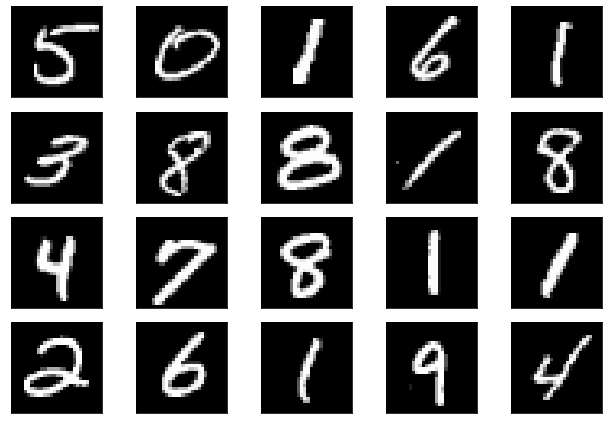

In [62]:
plt.figure(figsize=(9,6))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(imgXtrain[i].reshape(height,width),cmap="gray")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

# del imgX
# import gc
# gc.collect()

In [14]:
def generate_occluded(sample):
  sample2 = deepcopy(sample)
  sample2[:,(width//2)+1 :, :] = 0
  return sample2
# generate_occluded(imgXtrain[:2])

In [15]:
def retrieve_first_half(sample,occ):

  sample[:(width//2)+1, :] = occ[:(width//2)+1, :]



# ENCODER-DECODER Without Any Convolutional Layers

In [73]:
IMG_SHAPE = imgXtrain.shape[1:]

In [17]:
basic_code_size = 32

In [ ]:
drive_path = "/content/drive/MyDrive/ML_PROJECT"

In [18]:
def enc_dec_basic_model(IMG_SHAPE,basic_code_size):
  basic_enc = tf.keras.Sequential()
  #input layer
  basic_enc.add(tf.keras.layers.InputLayer(input_shape=IMG_SHAPE))
  #flatten the image
  basic_enc.add(tf.keras.layers.Flatten())
  #fully connected layer                  
  basic_enc.add(tf.keras.layers.Dense(basic_code_size))

  ip = tf.keras.layers.Input(IMG_SHAPE)
  encoder_op = basic_enc(ip)

  basic_dec= tf.keras.Sequential()
  basic_dec.add(tf.keras.layers.InputLayer(input_shape=(basic_code_size,)))
  basic_dec.add(tf.keras.layers.Dense(np.prod(IMG_SHAPE)))  
  #create image shape
  basic_dec.add(tf.keras.layers.Reshape(IMG_SHAPE))

  recreate_image = basic_dec(encoder_op)

  return ip,recreate_image



In [65]:
ip,recreate_image = enc_dec_basic_model(IMG_SHAPE,32)
basic_model = M.Model(ip,recreate_image)
basic_model.compile(optimizer='adam', loss='mse')

In [66]:
hist1 = basic_model.fit(x=imgXtrain,y=imgXtrain, epochs=20,validation_data=(imgXval,imgXval))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0241 - val_loss: 0.0178
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0176 - val_loss: 0.0176
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0175 - val_loss: 0.0175
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0175 - val_loss: 0.0175
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0175 - val_loss: 0.0174
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0175 - val_loss: 0.0174
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0175 - val_loss: 0.0174
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0175 - val_loss: 0.0174
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0175 - val_loss: 0.0174
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.017

In [67]:
basic_model.evaluate(imgXtest,imgXtest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0170


0.017000705003738403

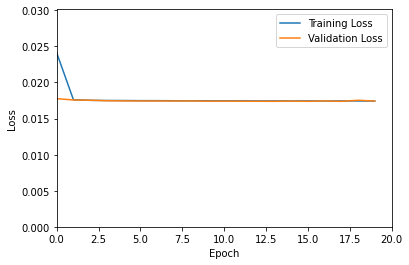

In [68]:

epochs_range = range(20)
val_loss = hist1.history['val_loss']
tr_loss = hist1.history['loss']
plt.plot(epochs_range, tr_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, (1+0.25)*max(max(tr_loss),max(val_loss))])
plt.xlim([0, 20])

plt.legend(loc='upper right')

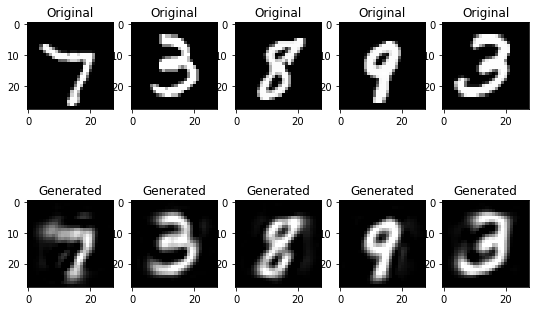

In [71]:
plt.figure(figsize=(9,6))
for i in range(5):
  enc_op = basic_model.layers[1].predict(imgXval[i][None])[0]
  dec_op = basic_model.layers[2].predict(enc_op[None])[0]
  plt.subplot(2,5,i+1)
  plt.title("Original")
  plt.imshow(np.clip(imgXval[i].reshape(height,width),0,1),cmap='gray')
  plt.subplot(2,5,i+6)
  plt.title("Generated")
  plt.imshow(np.clip(dec_op,0,1),cmap='gray')
plt.show()

In [34]:
occXtest = generate_occluded(imgXtest)

In [41]:
ip_64,recreate_image_64 = enc_dec_basic_model(IMG_SHAPE,64)
occ_basic_model_64 = M.Model(ip_64,recreate_image_64)
occ_basic_model_64.compile(optimizer='adam', loss='mse')

In [40]:
del occ_basic_model_64

In [42]:
tr_loss=[]
vl_loss=[]
for i in range(10):
  print("epoch : {}".format(i+1))
  occXtrain = generate_occluded(imgXtrain)
  occXval = generate_occluded(imgXval)
  l = occ_basic_model_64.fit(x=occXtrain,y=imgXtrain, epochs=1,validation_data=(occXval,imgXval))
  tr_loss.append(l.history["loss"])
  vl_loss.append(l.history["val_loss"])



epoch : 1
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0299 - val_loss: 0.0247
epoch : 2
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0242 - val_loss: 0.0238
epoch : 3
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0238 - val_loss: 0.0238
epoch : 4
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0237 - val_loss: 0.0237
epoch : 5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0237 - val_loss: 0.0237
epoch : 6
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0237 - val_loss: 0.0236
epoch : 7
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0237 - val_loss: 0.0237
epoch : 8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0237 - val_loss: 0.0236
epoch : 9
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0236 - val_loss: 0.0237
epoch : 10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0236 - val_lo

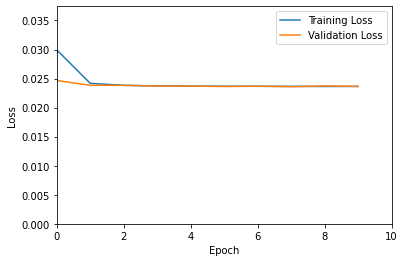

In [43]:


epochs_range = range(10)

plt.plot(epochs_range, tr_loss, label='Training Loss')
plt.plot(epochs_range, vl_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1.25 * max(max(tr_loss),max(vl_loss))[0] ])
plt.xlim([0, 10])

plt.legend(loc='upper right')

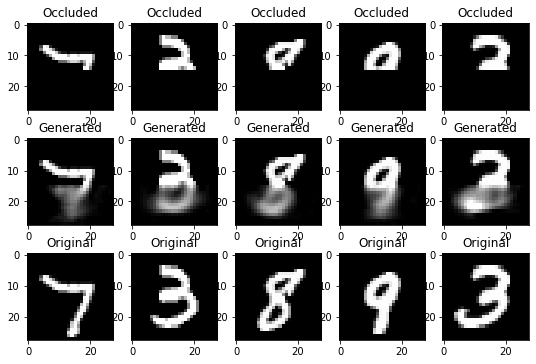

In [45]:
plt.figure(figsize=(9,6))
for i in range(5):
  oenc_op2 = occ_basic_model_64.layers[1].predict(occXval[i][None])[0]
  odec_op2 = occ_basic_model_64.layers[2].predict(oenc_op2[None])[0]
  retrieve_first_half(odec_op2,occXval[i])
  plt.subplot(3,5,i+1)
  plt.title("Occluded")
  plt.imshow(np.clip(occXval[i],0,1),cmap='gray')
  plt.subplot(3,5,i+6)
  plt.title("Generated")
  plt.imshow(np.clip(odec_op2,0,1),cmap='gray')
  plt.subplot(3,5,i+11)
  plt.title("Original")
  plt.imshow(np.clip(imgXval[i],0,1),cmap='gray')
plt.show()

In [46]:
occ_basic_model_64.evaluate(occXtest,imgXtest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0234


0.023388268426060677

## Developing deep CNN based Model

In [47]:
def deep_cnn_model(img_shape, latent_dim):

    # encoder
    encoder = tf.keras.Sequential()
    encoder.add(tf.keras.layers.InputLayer(img_shape))
    encoder.add(tf.keras.layers.Conv2D(32, input_shape=img_shape, kernel_size=(5, 5), activation='relu', padding='same'))
    encoder.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    encoder.add(tf.keras.layers.Conv2D(64, input_shape=img_shape[1:], kernel_size=(5, 5), activation='relu', padding='same'))
    encoder.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    encoder.add(
        tf.keras.layers.Conv2D(128, input_shape=img_shape[1:], kernel_size=(5, 5), activation='relu', padding='same'))

    encoder.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    encoder.add(
        tf.keras.layers.Conv2D(256, input_shape=img_shape[1:], kernel_size=(5, 5), activation='relu', padding='same'))
    encoder.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(tf.keras.layers.Flatten())
    encoder.add(tf.keras.layers.Dense(latent_dim))

    # decoder
    decoder = tf.keras.Sequential()
    decoder.add(L.InputLayer((latent_dim,)))
    decoder.add(L.Dense(np.prod(img_shape)))
    decoder.add(L.Reshape(img_shape))

    decoder.add(L.Conv2DTranspose(128, input_shape=img_shape, kernel_size=(5, 5), activation='relu', padding='same'))

    decoder.add(L.Conv2DTranspose(64, input_shape=img_shape, kernel_size=(5, 5), activation='relu', padding='same'))

    decoder.add(L.Conv2DTranspose(32, input_shape=img_shape, kernel_size=(5, 5), activation='relu', padding='same'))

    decoder.add(L.Conv2DTranspose(3, input_shape=img_shape, kernel_size=(5, 5), activation=None, padding='same'))

    return encoder, decoder

In [ ]:
# del deep_model_32,cnn_encoder_32,cnn_decoder_32

In [74]:
cnn_encoder_32, cnn_decoder_32 = deep_cnn_model(IMG_SHAPE, latent_dim=32)

In [75]:

inp_32 = tf.keras.layers.Input(IMG_SHAPE)
enc_op_32 = cnn_encoder_32(inp_32)
dec_op_32 = cnn_decoder_32(enc_op_32)

deep_model_32 = tf.keras.models.Model(inp_32,dec_op_32)
deep_model_32.compile(optimizer="adamax", loss='mse')


In [76]:
hist_32 = deep_model_32.fit(x=imgXtrain,y=imgXtrain, epochs=15,validation_data=(imgXval,imgXval))

Epoch 1/15
1500/1500 [==============================] - 73s 31ms/step - loss: 0.0206 - val_loss: 0.0095
Epoch 2/15
1500/1500 [==============================] - 46s 30ms/step - loss: 0.0075 - val_loss: 0.0062
Epoch 3/15
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0055 - val_loss: 0.0051
Epoch 4/15
1500/1500 [==============================] - 46s 30ms/step - loss: 0.0047 - val_loss: 0.0045
Epoch 5/15
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 6/15
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 7/15
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 8/15
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 9/15
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 10/15
1500/1500 [==============================] - 46s 31m

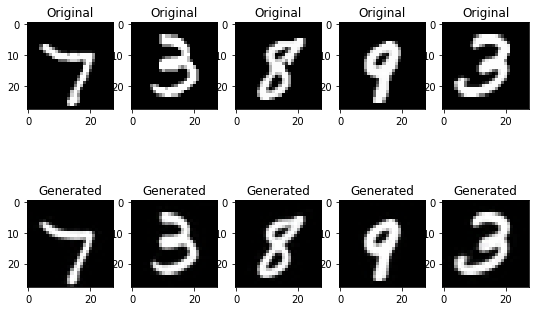

In [78]:
plt.figure(figsize=(9,6))
for i in range(5):
  enc_op = cnn_encoder_32.predict(imgXval[i][None])[0]
  dec_op = cnn_decoder_32.predict(enc_op[None])[0]
  plt.subplot(2,5,i+1)
  plt.title("Original")
  plt.imshow(np.clip(imgXval[i].reshape(height,width),0,1),cmap='gray')
  plt.subplot(2,5,i+6)
  plt.title("Generated")
  plt.imshow(np.clip(dec_op,0,1),cmap='gray')
plt.show()

In [80]:
tf.keras.models.save_model(deep_model_32,drive_path+"/mnist_deep_model_32")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_PROJECT/mnist_deep_model_32/assets


In [81]:
load_32 = tf.keras.models.load_model(drive_path+"/mnist_deep_model_32")

In [84]:
load_32.evaluate(imgXtest, imgXtest)

313/313 [==============================] - 3s 9ms/step - loss: 0.0030


0.00303779193200171

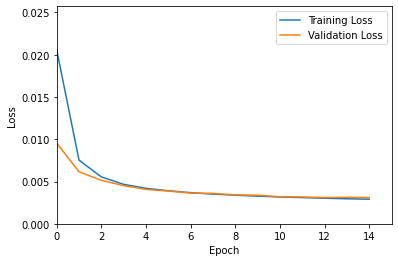

In [85]:

epochs_range = range(15)
val_loss = hist_32.history['val_loss']
tr_loss = hist_32.history['loss']
plt.plot(epochs_range, tr_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, (1+0.25)*max(max(tr_loss),max(val_loss))])
plt.xlim([0, 15])

plt.legend(loc='upper right')

# OCCLUSION STARTS

In [93]:
del occ_cnn_encoder_64,occ_cnn_decoder_64,occ_deep_model_64

In [94]:
tf.keras.backend.clear_session()
occ_cnn_encoder_64, occ_cnn_decoder_64 = deep_cnn_model(IMG_SHAPE, latent_dim=32)

inp_64 = tf.keras.layers.Input(IMG_SHAPE)
occ_enc_op_64 = occ_cnn_encoder_64(inp_64)
occ_dec_op_64 = occ_cnn_decoder_64(occ_enc_op_64)

occ_deep_model_64 = tf.keras.models.Model(inp_64,occ_dec_op_64)
occ_deep_model_64.compile(optimizer="adam", loss='mse')

In [95]:
tr_loss=[]
vl_loss=[]
for i in range(15):
  print("epoch : {}".format(i+1))
  occXtrain = generate_occluded(imgXtrain)
  occXval = generate_occluded(imgXval)
  l = occ_deep_model_64.fit(x=occXtrain,y=imgXtrain, epochs=1,validation_data=(occXval,imgXval))
  tr_loss.append(l.history["loss"])
  vl_loss.append(l.history["val_loss"])

epoch : 1
1500/1500 [==============================] - 46s 30ms/step - loss: 0.0307 - val_loss: 0.0204
epoch : 2
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0185 - val_loss: 0.0179
epoch : 3
1500/1500 [==============================] - 44s 30ms/step - loss: 0.0168 - val_loss: 0.0164
epoch : 4
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0159 - val_loss: 0.0157
epoch : 5
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0152 - val_loss: 0.0157
epoch : 6
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0148 - val_loss: 0.0158
epoch : 7
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0144 - val_loss: 0.0152
epoch : 8
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0140 - val_loss: 0.0152
epoch : 9
1500/1500 [==============================] - 47s 32ms/step - loss: 0.0137 - val_loss: 0.0148
epoch : 10
1500/1500 [==============================] - 48s 32ms/step - l

In [96]:
tf.keras.models.save_model(occ_deep_model_64,drive_path+"/mnist_occ_deep_model_32")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_PROJECT/mnist_occ_deep_model_32/assets


In [89]:
occXtest = generate_occluded(imgXtest)


In [97]:
occ_deep_model_64.evaluate(occXtest,imgXtest)

313/313 [==============================] - 3s 10ms/step - loss: 0.0150


0.015031781047582626

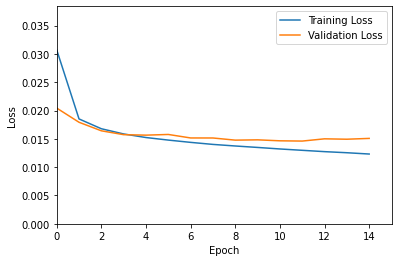

In [98]:

epochs_range = range(15)

plt.plot(epochs_range, tr_loss, label='Training Loss')
plt.plot(epochs_range, vl_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1.25 * max(max(tr_loss),max(vl_loss))[0] ])
plt.xlim([0, 15])

plt.legend(loc='upper right')

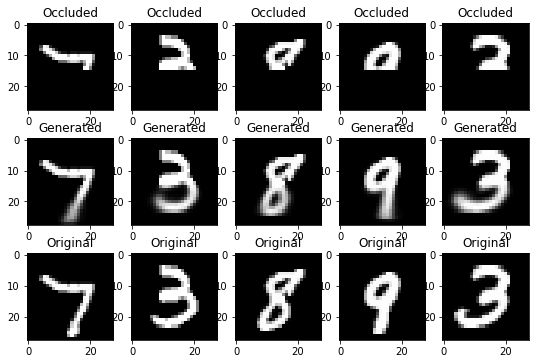

In [99]:
plt.figure(figsize=(9,6))
for i in range(5):
  oenc_op2 = occ_cnn_encoder_64.predict(occXval[i][None])[0]
  odec_op2 = occ_cnn_decoder_64.predict(oenc_op2[None])[0]
  retrieve_first_half(odec_op2,occXval[i])
  plt.subplot(3,5,i+1)
  plt.title("Occluded")
  plt.imshow(np.clip(occXval[i].reshape(height,width),0,1),cmap="gray")
  plt.subplot(3,5,i+6)
  plt.title("Generated")
  plt.imshow(np.clip(odec_op2,0,1),cmap="gray")
  plt.subplot(3,5,i+11)
  plt.title("Original")
  plt.imshow(np.clip(imgXval[i].reshape(height,width),0,1),cmap="gray")
plt.show()

In [ ]:
del occ_cnn_encoder_128,occ_cnn_decoder_128,occ_deep_model_128

CHANGE lATENT DIMS

In [100]:
tf.keras.backend.clear_session()
occ_cnn_encoder_128, occ_cnn_decoder_128 = deep_cnn_model(IMG_SHAPE, latent_dim=128)

inp_128 = tf.keras.layers.Input(IMG_SHAPE)
occ_enc_op_128 = occ_cnn_encoder_128(inp_128)
occ_dec_op_128 = occ_cnn_decoder_128(occ_enc_op_128)

occ_deep_model_128 = tf.keras.models.Model(inp_128,occ_dec_op_128)
occ_deep_model_128.compile(optimizer="adam", loss='mse')

In [101]:
tr_loss=[]
vl_loss=[]
for i in range(15):
  print("epoch : {}".format(i+1))
  occXtrain = generate_occluded(imgXtrain)
  occXval = generate_occluded(imgXval)
  l = occ_deep_model_128.fit(x=occXtrain,y=imgXtrain, epochs=1,validation_data=(occXval,imgXval))
  tr_loss.append(l.history["loss"])
  vl_loss.append(l.history["val_loss"])

epoch : 1
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0311 - val_loss: 0.0199
epoch : 2
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0185 - val_loss: 0.0175
epoch : 3
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0168 - val_loss: 0.0165
epoch : 4
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0159 - val_loss: 0.0160
epoch : 5
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0152 - val_loss: 0.0154
epoch : 6
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0147 - val_loss: 0.0150
epoch : 7
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0143 - val_loss: 0.0153
epoch : 8
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0139 - val_loss: 0.0148
epoch : 9
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0136 - val_loss: 0.0149
epoch : 10
1500/1500 [==============================] - 45s 30ms/step - l

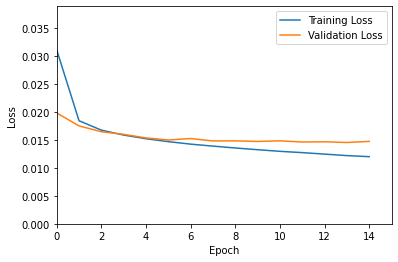

In [102]:

epochs_range = range(15)

plt.plot(epochs_range, tr_loss, label='Training Loss')
plt.plot(epochs_range, vl_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1.25 * max(max(tr_loss),max(vl_loss))[0] ])
plt.xlim([0, 15])

plt.legend(loc='upper right')

In [103]:
tf.keras.models.save_model(occ_deep_model_128,drive_path+"/mnist_occ_deep_model_128")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_PROJECT/mnist_occ_deep_model_128/assets


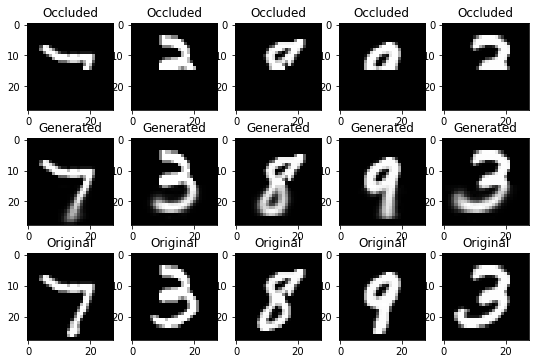

In [105]:
plt.figure(figsize=(9,6))
for i in range(5):
  oenc_op3 = occ_cnn_encoder_128.predict(occXval[i][None])[0]
  odec_op3 = occ_cnn_decoder_128.predict(oenc_op3[None])[0]
  retrieve_first_half(odec_op3,occXval[i])
  plt.subplot(3,5,i+1)
  plt.title("Occluded")
  plt.imshow(np.clip(occXval[i].reshape(height,width),0,1),cmap="gray")
  plt.subplot(3,5,i+6)
  plt.title("Generated")
  plt.imshow(np.clip(odec_op3,0,1))
  plt.subplot(3,5,i+11)
  plt.title("Original")
  plt.imshow(np.clip(imgXval[i].reshape(height,width),0,1),cmap="gray")

plt.show()

In [106]:
occ_deep_model_128.evaluate(occXtest,imgXtest)

313/313 [==============================] - 3s 10ms/step - loss: 0.0147


0.014737511985003948

In [107]:
del occ_cnn_encoder_128,occ_cnn_decoder_128,occ_deep_model_128

In [108]:
import gc
gc.collect()

57315

#Latent = 512

In [ ]:
# 35*35

1225

In [109]:
tf.keras.backend.clear_session()
occ_cnn_encoder_512, occ_cnn_decoder_512 = deep_cnn_model(IMG_SHAPE, latent_dim=512)

inp_512 = tf.keras.layers.Input(IMG_SHAPE)
occ_enc_op_512 = occ_cnn_encoder_512(inp_512)
occ_dec_op_512 = occ_cnn_decoder_512(occ_enc_op_512)

occ_deep_model_512 = tf.keras.models.Model(inp_512,occ_dec_op_512)
occ_deep_model_512.compile(optimizer="adam", loss='mse')

In [ ]:
del occ_cnn_encoder_512,occ_cnn_decoder_512,occ_deep_model_512

In [110]:
tr_loss=[]
vl_loss=[]
for epoch in range(15):
  print("epoch : {}".format(epoch+1))
  occXtrain = generate_occluded(imgXtrain)
  occXval = generate_occluded(imgXval)
  l = occ_deep_model_512.fit(x=occXtrain,y=imgXtrain, epochs=1,validation_data=(occXval,imgXval))
  tr_loss.append(l.history["loss"])
  vl_loss.append(l.history["val_loss"])

epoch : 1
1500/1500 [==============================] - 49s 32ms/step - loss: 0.0279 - val_loss: 0.0188
epoch : 2
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0176 - val_loss: 0.0169
epoch : 3
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0163 - val_loss: 0.0160
epoch : 4
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0155 - val_loss: 0.0153
epoch : 5
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0149 - val_loss: 0.0157
epoch : 6
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0145 - val_loss: 0.0150
epoch : 7
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0141 - val_loss: 0.0152
epoch : 8
1500/1500 [==============================] - 47s 32ms/step - loss: 0.0138 - val_loss: 0.0148
epoch : 9
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0136 - val_loss: 0.0149
epoch : 10
1500/1500 [==============================] - 48s 32ms/step - l

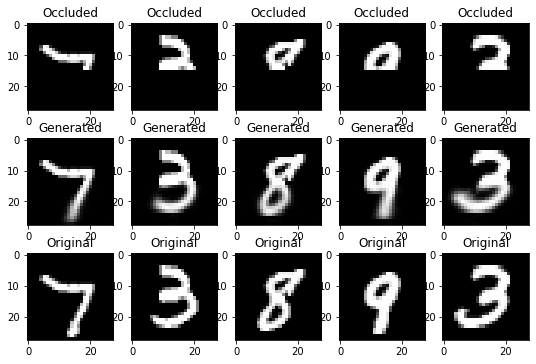

In [111]:
plt.figure(figsize=(9,6))
for i in range(5):
  oenc_op4 = occ_cnn_encoder_512.predict(occXval[i][None])[0]
  odec_512 = occ_cnn_decoder_512.predict(oenc_op4[None])[0]
  retrieve_first_half(odec_512,occXval[i])
  plt.subplot(3,5,i+1)
  plt.title("Occluded")
  plt.imshow(np.clip(occXval[i].reshape(height,width),0,1),cmap="gray")
  plt.subplot(3,5,i+6)
  plt.title("Generated")
  plt.imshow(np.clip(odec_512,0,1))
  plt.subplot(3,5,i+11)
  plt.title("Original")
  plt.imshow(np.clip(imgXval[i].reshape(height,width),0,1),cmap="gray")

plt.show()

In [112]:
tf.keras.models.save_model(occ_deep_model_512,drive_path+"/mnist_occ_deep_model_512")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_PROJECT/mnist_occ_deep_model_512/assets


In [113]:
occ_deep_model_512.evaluate(occXtest,imgXtest)

313/313 [==============================] - 3s 10ms/step - loss: 0.0146


0.014567428268492222

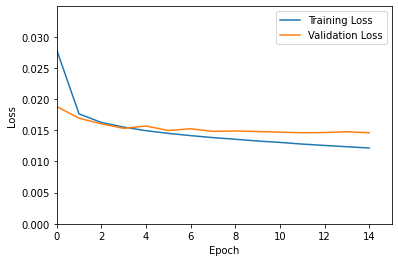

In [114]:

epochs_range = range(15)

plt.plot(epochs_range, tr_loss, label='Training Loss')
plt.plot(epochs_range, vl_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1.25 * max(max(tr_loss),max(vl_loss))[0] ])
plt.xlim([0, 15])

plt.legend(loc='upper right')